In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Oseias_1", "'word', 'lord', 'came', 'hosea', ',', 'son', 'beeri', ',', 'days', 'uzziah', ',', 'jotham', ',', 'ahaz', ',', 'hezekiah', ',', 'kings', 'judah', ',', 'days', 'jeroboam', 'son', 'joash', ',', 'king', 'israel.the', 'beginning', 'word', 'lord', 'hosea', '.', 'lord', 'said', 'hosea', ',', 'go', ',', 'take', 'wife', 'prostitutions', 'children', 'prostitutions', ':', 'land', 'committed', 'great', 'prostitution', ',', 'departing', 'lord.so', 'went', 'took', 'gomer', 'daughter', 'diblaim', ';', 'conceived', ',', 'bore', 'son.and', 'lord', 'said', ',', 'call', 'name', 'jezreel', ';', 'yet', 'little', ',', 'avenge', 'blood', 'jezreel', 'house', 'jehu', ',', 'cause', 'cease', 'kingdom', 'house', 'israel.and', 'shall', 'come', 'pass', 'day', ',', 'break', 'bow', 'israel', ',', 'valley', 'jezreel.and', 'conceived', ',', 'bore', 'daughter', '.', 'god', 'said', ',', 'call', 'name', 'loruhamah', ':', 'mercy', 'house', 'israel', ';', 'utterly', 'take', 'away.but', 'mercy', 'house', 'judah', ',', 'save', 'lord', 'god', ',', 'save', 'bow', ',', 'sword', ',', 'battle', ',', 'horses', ',', 'horsemen.now', 'weaned', 'loruhamah', ',', 'conceived', ',', 'bore', 'son.then', 'said', 'god', ',', 'call', 'name', 'loammi', ':', 'people', ',', 'god.yet', 'number', 'children', 'israel', 'shall', 'sand', 'sea', ',', 'measured', 'numbered', ';', 'shall', 'come', 'pass', ',', 'place', 'said', ',', 'people', ',', 'shall', 'said', ',', 'sons', 'living', 'god.then', 'shall', 'children', 'judah', 'children', 'israel', 'gathered', 'together', ',', 'appoint', 'one', 'head', ',', 'shall', 'come', 'land', ':', 'great', 'shall', 'day', 'jezreel', '.'"], 
               ["Oseias_2", "'say', 'brothers', ',', 'ammi', ';', 'sisters', ',', 'ruhamah.plead', 'mother', ',', 'plead', ':', 'wife', ',', 'neither', 'husband', ':', 'let', 'therefore', 'put', 'away', 'prostitutions', 'sight', ',', 'adulteries', 'breasts', ';', 'lest', 'strip', 'naked', ',', 'set', 'day', 'born', ',', 'make', 'wilderness', ',', 'set', 'like', 'dry', 'land', ',', 'slay', 'thirst.and', 'mercy', 'children', ';', 'children', 'prostitutions.for', 'mother', 'played', 'harlot', ':', 'conceived', 'done', 'shamefully', ':', 'said', ',', 'go', 'lovers', ',', 'give', 'bread', 'water', ',', 'wool', 'flax', ',', 'oil', 'drink.therefore', ',', 'behold', ',', 'hedge', 'way', 'thorns', ',', 'make', 'wall', ',', 'shall', 'find', 'paths.and', 'shall', 'follow', 'lovers', ',', 'shall', 'overtake', ';', 'shall', 'seek', ',', 'shall', 'find', ':', 'shall', 'say', ',', 'go', 'return', 'first', 'husband', ';', 'better', 'now.for', 'know', 'gave', 'corn', ',', 'wine', ',', 'oil', ',', 'multiplied', 'silver', 'gold', ',', 'prepared', 'baal.therefore', 'return', ',', 'take', 'away', 'corn', 'time', 'thereof', ',', 'wine', 'season', 'thereof', ',', 'recover', 'wool', 'flax', 'given', 'cover', 'nakedness.and', 'discover', 'lewdness', 'sight', 'lovers', ',', 'none', 'shall', 'deliver', 'hand.i', 'also', 'cause', 'mirth', 'cease', ',', 'feast', 'days', ',', 'new', 'moons', ',', 'sabbaths', ',', 'solemn', 'feasts.and', 'destroy', 'vines', 'fig', 'trees', ',', 'whereof', 'said', ',', 'rewards', 'lovers', 'given', ':', 'make', 'forest', ',', 'beasts', 'field', 'shall', 'eat', 'them.and', 'visit', 'days', 'baalim', ',', 'wherein', 'burned', 'incense', ',', 'decked', 'earrings', 'jewels', ',', 'went', 'lovers', ',', 'forgot', ',', 'said', 'lord.therefore', ',', 'behold', ',', 'allure', ',', 'bring', 'wilderness', ',', 'speak', 'comfortably', 'her.and', 'give', 'vineyards', ',', 'valley', 'achor', 'door', 'hope', ':', 'shall', 'sing', ',', 'days', 'youth', ',', 'day', 'came', 'land', 'egypt.and', 'shall', 'day', ',', 'said', 'lord', ',', 'shall', 'call', 'ishi', ';', 'shall', 'call', 'baali.for', 'take', 'away', 'names', 'baalim', 'mouth', ',', 'shall', 'remembered', 'name.and', 'day', 'make', 'covenant', 'beasts', 'field', 'fowls', 'heaven', ',', 'creeping', 'things', 'ground', ':', 'break', 'bow', 'sword', 'battle', 'earth', ',', 'make', 'lie', 'safely.and', 'betroth', 'ever', ';', 'yes', ',', 'betroth', 'righteousness', ',', 'judgment', ',', 'loving', 'kindness', ',', 'mercies.i', 'even', 'betroth', 'faithfulness', ':', 'shall', 'know', 'lord.and', 'shall', 'come', 'pass', 'day', ',', 'hear', ',', 'said', 'lord', ',', 'hear', 'heavens', ',', 'shall', 'hear', 'earth', ';', 'earth', 'shall', 'hear', 'corn', ',', 'wine', ',', 'oil', ';', 'shall', 'hear', 'jezreel.and', 'sow', 'earth', ';', 'mercy', 'obtained', 'mercy', ';', 'say', 'people', ',', 'people', ';', 'shall', 'say', ',', 'god', '.'"],
               ["Oseias_3", "'said', 'lord', ',', 'go', 'yet', ',', 'love', 'woman', 'beloved', 'friend', ',', 'yet', 'adulteress', ',', 'according', 'love', 'lord', 'toward', 'children', 'israel', ',', 'look', 'gods', ',', 'love', 'flagons', 'wine.so', 'bought', 'fifteen', 'pieces', 'silver', ',', 'homer', 'barley', ',', 'half', 'homer', 'barley', ':', 'said', ',', 'shall', 'abide', 'many', 'days', ';', 'shall', 'play', 'harlot', ',', 'shall', 'another', 'man', ':', 'also', 'you.for', 'children', 'israel', 'shall', 'abide', 'many', 'days', 'without', 'king', ',', 'without', 'prince', ',', 'without', 'sacrifice', ',', 'without', 'image', ',', 'without', 'ephod', ',', 'without', 'teraphim', ':', 'afterward', 'shall', 'children', 'israel', 'return', ',', 'seek', 'lord', 'god', ',', 'david', 'king', ';', 'shall', 'fear', 'lord', 'goodness', 'latter', 'days', '.'"],
               ["Oseias_4", "'hear', 'word', 'lord', ',', 'children', 'israel', ':', 'lord', 'controversy', 'inhabitants', 'land', ',', 'truth', ',', 'mercy', ',', 'knowledge', 'god', 'land.by', 'swearing', ',', 'lying', ',', 'killing', ',', 'stealing', ',', 'committing', 'adultery', ',', 'break', ',', 'blood', 'touches', 'blood.therefore', 'shall', 'land', 'mourn', ',', 'every', 'one', 'dwells', 'therein', 'shall', 'languish', ',', 'beasts', 'field', ',', 'fowls', 'heaven', ';', 'yes', ',', 'fishes', 'sea', 'also', 'shall', 'taken', 'away.yet', 'let', 'man', 'strive', ',', 'reprove', 'another', ':', 'people', 'strive', 'priest.therefore', 'shall', 'fall', 'day', ',', 'prophet', 'also', 'shall', 'fall', 'night', ',', 'destroy', 'mother.my', 'people', 'destroyed', 'lack', 'knowledge', ':', 'rejected', 'knowledge', ',', 'also', 'reject', ',', 'shall', 'priest', ':', 'seeing', 'forgotten', 'law', 'god', ',', 'also', 'forget', 'children.as', 'increased', ',', 'sinned', ':', 'therefore', 'change', 'glory', 'shame.they', 'eat', 'sin', 'people', ',', 'set', 'heart', 'iniquity.and', 'shall', ',', 'like', 'people', ',', 'like', 'priest', ':', 'punish', 'ways', ',', 'reward', 'doings.for', 'shall', 'eat', ',', 'enough', ':', 'shall', 'commit', 'prostitution', ',', 'shall', 'increase', ':', 'left', 'take', 'heed', 'lord.prostitution', 'wine', 'new', 'wine', 'take', 'away', 'heart.my', 'people', 'ask', 'counsel', 'stocks', ',', 'staff', 'declares', ':', 'spirit', 'prostitutions', 'caused', 'err', ',', 'gone', 'whoring', 'god.they', 'sacrifice', 'tops', 'mountains', ',', 'burn', 'incense', 'hills', ',', 'oaks', 'poplars', 'elms', ',', 'shadow', 'thereof', 'good', ':', 'therefore', 'daughters', 'shall', 'commit', 'prostitution', ',', 'spouses', 'shall', 'commit', 'adultery.i', 'punish', 'daughters', 'commit', 'prostitution', ',', 'spouses', 'commit', 'adultery', ':', 'separated', 'whores', ',', 'sacrifice', 'harlots', ':', 'therefore', 'people', 'understand', 'shall', 'fall.though', ',', 'israel', ',', 'play', 'harlot', ',', 'yet', 'let', 'judah', 'offend', ';', 'come', 'gilgal', ',', 'neither', 'go', 'bethaven', ',', 'swear', ',', 'lord', 'lives.for', 'israel', 'slides', 'back', 'backsliding', 'heifer', ':', 'lord', 'feed', 'lamb', 'large', 'place.ephraim', 'joined', 'idols', ':', 'let', 'alone.their', 'drink', 'sour', ':', 'committed', 'prostitution', 'continually', ':', 'rulers', 'shame', 'love', ',', 'give', 'you.the', 'wind', 'bound', 'wings', ',', 'shall', 'ashamed', 'sacrifices', '.'"],
               ["Oseias_5", "'hear', ',', 'priests', ';', 'listen', ',', 'house', 'israel', ';', 'give', 'ear', ',', 'house', 'king', ';', 'judgment', 'toward', ',', 'snare', 'mizpah', ',', 'net', 'spread', 'tabor.and', 'rebels', 'profound', 'make', 'slaughter', ',', 'though', 'rebuker', 'all.i', 'know', 'ephraim', ',', 'israel', 'hid', ':', ',', 'ephraim', ',', 'commit', 'prostitution', ',', 'israel', 'defiled.they', 'frame', 'doings', 'turn', 'god', ':', 'spirit', 'prostitutions', 'middle', ',', 'known', 'lord.and', 'pride', 'israel', 'testify', 'face', ':', 'therefore', 'shall', 'israel', 'ephraim', 'fall', 'iniquity', ':', 'judah', 'also', 'shall', 'fall', 'them.they', 'shall', 'go', 'flocks', 'herds', 'seek', 'lord', ';', 'shall', 'find', ';', 'withdrawn', 'them.they', 'dealt', 'treacherously', 'lord', ':', 'begotten', 'strange', 'children', ':', 'shall', 'month', 'devour', 'portions.blow', 'cornet', 'gibeah', ',', 'trumpet', 'ramah', ':', 'cry', 'aloud', 'bethaven', ',', ',', 'benjamin.ephraim', 'shall', 'desolate', 'day', 'rebuke', ':', 'among', 'tribes', 'israel', 'made', 'known', 'shall', 'surely', 'be.the', 'princes', 'judah', 'like', 'remove', 'bound', ':', 'therefore', 'pour', 'wrath', 'like', 'water.ephraim', 'oppressed', 'broken', 'judgment', ',', 'willingly', 'walked', 'commandment.therefore', 'ephraim', 'moth', ',', 'house', 'judah', 'rottenness.when', 'ephraim', 'saw', 'sickness', ',', 'judah', 'saw', 'wound', ',', 'went', 'ephraim', 'assyrian', ',', 'sent', 'king', 'jareb', ':', 'yet', 'could', 'heal', ',', 'cure', 'wound.for', 'ephraim', 'lion', ',', 'young', 'lion', 'house', 'judah', ':', ',', 'even', ',', 'tear', 'go', 'away', ';', 'take', 'away', ',', 'none', 'shall', 'rescue', 'him.i', 'go', 'return', 'place', ',', 'till', 'acknowledge', 'offense', ',', 'seek', 'face', ':', 'affliction', 'seek', 'early', '.'"],
               ["Oseias_6", "'come', ',', 'let', 'us', 'return', 'lord', ':', 'torn', ',', 'heal', 'us', ';', 'smitten', ',', 'bind', 'us', 'up.after', 'two', 'days', 'revive', 'us', ':', 'third', 'day', 'raise', 'us', ',', 'shall', 'live', 'sight.then', 'shall', 'know', ',', 'follow', 'know', 'lord', ':', 'going', 'forth', 'prepared', 'morning', ';', 'shall', 'come', 'us', 'rain', ',', 'latter', 'former', 'rain', 'eartho', 'ephraim', ',', 'shall', '?', 'judah', ',', 'shall', '?', 'goodness', 'morning', 'cloud', ',', 'early', 'dew', 'goes', 'away.therefore', 'hewed', 'prophets', ';', 'slain', 'words', 'mouth', ':', 'judgments', 'light', 'goes', 'forth.for', 'desired', 'mercy', ',', 'sacrifice', ';', 'knowledge', 'god', 'burnt', 'offerings.but', 'like', 'men', 'transgressed', 'covenant', ':', 'dealt', 'treacherously', 'me.gilead', 'city', 'work', 'iniquity', ',', 'polluted', 'blood.and', 'troops', 'robbers', 'wait', 'man', ',', 'company', 'priests', 'murder', 'way', 'consent', ':', 'commit', 'lewdness.i', 'seen', 'horrible', 'thing', 'house', 'israel', ':', 'prostitution', 'ephraim', ',', 'israel', 'defiled.also', ',', 'judah', ',', 'set', 'harvest', ',', 'returned', 'captivity', 'people', '.'"],
               ["Oseias_7", "'would', 'healed', 'israel', ',', 'iniquity', 'ephraim', 'discovered', ',', 'wickedness', 'samaria', ':', 'commit', 'falsehood', ';', 'thief', 'comes', ',', 'troop', 'robbers', 'spoils', 'without.and', 'consider', 'hearts', 'remember', 'wickedness', ':', 'doings', 'beset', ';', 'face.they', 'make', 'king', 'glad', 'wickedness', ',', 'princes', 'lies.they', 'adulterers', ',', 'oven', 'heated', 'baker', ',', 'ceases', 'raising', 'kneaded', 'dough', ',', 'leavened.in', 'day', 'king', 'princes', 'made', 'sick', 'bottles', 'wine', ';', 'stretched', 'hand', 'scorners.for', 'made', 'ready', 'heart', 'like', 'oven', ',', 'whiles', 'lie', 'wait', ':', 'baker', 'sleeps', 'night', ';', 'morning', 'burns', 'flaming', 'fire.they', 'hot', 'oven', ',', 'devoured', 'judges', ';', 'kings', 'fallen', ':', 'none', 'among', 'calls', 'me.ephraim', ',', 'mixed', 'among', 'people', ';', 'ephraim', 'cake', 'turned.strangers', 'devoured', 'strength', ',', 'knows', ':', 'yes', ',', 'gray', 'hairs', ',', 'yet', 'knows', 'not.and', 'pride', 'israel', 'testifies', 'face', ':', 'return', 'lord', 'god', ',', 'seek', 'this.ephraim', 'also', 'like', 'silly', 'dove', 'without', 'heart', ':', 'call', 'egypt', ',', 'go', 'assyria.when', 'shall', 'go', ',', 'spread', 'net', ';', 'bring', 'fowls', 'heaven', ';', 'chastise', ',', 'congregation', 'heard.woe', '!', 'fled', ':', 'destruction', '!', 'transgressed', ':', 'though', 'redeemed', ',', 'yet', 'spoken', 'lies', 'me.and', 'cried', 'heart', ',', 'howled', 'beds', ':', 'assemble', 'corn', 'wine', ',', 'rebel', 'me.though', 'bound', 'strengthened', 'arms', ',', 'yet', 'imagine', 'mischief', 'me.they', 'return', ',', 'high', ':', 'like', 'deceitful', 'bow', ':', 'princes', 'shall', 'fall', 'sword', 'rage', 'tongue', ':', 'shall', 'derision', 'land', 'egypt', '.'"],
               ["Oseias_8", "'set', 'trumpet', 'mouth', '.', 'shall', 'come', 'eagle', 'house', 'lord', ',', 'transgressed', 'covenant', ',', 'trespassed', 'law.israel', 'shall', 'cry', ',', 'god', ',', 'know', 'you.israel', 'cast', 'thing', 'good', ':', 'enemy', 'shall', 'pursue', 'him.they', 'set', 'kings', ',', ':', 'made', 'princes', ',', 'knew', ':', 'silver', 'gold', 'made', 'idols', ',', 'may', 'cut', 'off.your', 'calf', ',', 'samaria', ',', 'cast', ';', 'anger', 'kindled', ':', 'long', 'ere', 'attain', 'innocence', '?', 'israel', 'also', ':', 'workman', 'made', ';', 'therefore', 'god', ':', 'calf', 'samaria', 'shall', 'broken', 'pieces.for', 'sown', 'wind', ',', 'shall', 'reap', 'whirlwind', ':', 'stalk', ';', 'bud', 'shall', 'yield', 'meal', ':', 'yield', ',', 'strangers', 'shall', 'swallow', 'up.israel', 'swallowed', ':', 'shall', 'among', 'gentiles', 'vessel', 'wherein', 'pleasure.for', 'gone', 'assyria', ',', 'wild', 'ass', 'alone', ':', 'ephraim', 'hired', 'lovers.yes', ',', 'though', 'hired', 'among', 'nations', ',', 'gather', ',', 'shall', 'sorrow', 'little', 'burden', 'king', 'princes.because', 'ephraim', 'made', 'many', 'altars', 'sin', ',', 'altars', 'shall', 'sin.i', 'written', 'great', 'things', 'law', ',', 'counted', 'strange', 'thing.they', 'sacrifice', 'flesh', 'sacrifices', 'offerings', ',', 'eat', ';', 'lord', 'accepts', ';', 'remember', 'iniquity', ',', 'visit', 'sins', ':', 'shall', 'return', 'egypt.for', 'israel', 'forgotten', 'maker', ',', 'builds', 'temples', ';', 'judah', 'multiplied', 'fenced', 'cities', ':', 'send', 'fire', 'cities', ',', 'shall', 'devour', 'palaces', 'thereof', '.'"],
               ["Oseias_9", "'rejoice', ',', 'israel', ',', 'joy', ',', 'people', ':', 'gone', 'whoring', 'god', ',', 'loved', 'reward', 'every', 'corn', 'floor.the', 'floor', 'wine', 'press', 'shall', 'feed', ',', 'new', 'wine', 'shall', 'fail', 'her.they', 'shall', 'dwell', 'lord', ', 'land', ';', 'ephraim', 'shall', 'return', 'egypt', ',', 'shall', 'eat', 'unclean', 'things', 'assyria.they', 'shall', 'offer', 'wine', 'offerings', 'lord', ',', 'neither', 'shall', 'pleasing', ':', 'sacrifices', 'shall', 'bread', 'mourners', ';', 'eat', 'thereof', 'shall', 'polluted', ':', 'bread', 'soul', 'shall', 'come', 'house', 'lord.what', 'solemn', 'day', ',', 'day', 'feast', 'lord', '?', ',', 'see', ',', 'gone', 'destruction', ':', 'egypt', 'shall', 'gather', ',', 'memphis', 'shall', 'bury', ':', 'pleasant', 'places', 'silver', ',', 'nettles', 'shall', 'possess', ':', 'thorns', 'shall', 'tabernacles.the', 'days', 'visitation', 'come', ',', 'days', 'recompense', 'come', ';', 'israel', 'shall', 'know', ':', 'prophet', 'fool', ',', 'spiritual', 'man', 'mad', ',', 'multitude', 'iniquity', ',', 'great', 'hatred.the', 'watchman', 'ephraim', 'god', ':', 'prophet', 'snare', 'fowler', 'ways', ',', 'hatred', 'house', 'god.they', 'deeply', 'corrupted', ',', 'days', 'gibeah', ':', 'therefore', 'remember', 'iniquity', ',', 'visit', 'sins.i', 'found', 'israel', 'like', 'grapes', 'wilderness', ';', 'saw', 'fathers', 'first', 'ripe', 'fig', 'tree', 'first', 'time', ':', 'went', 'baalpeor', ',', 'separated', 'shame', ';', 'abominations', 'according', 'loved.as', 'ephraim', ',', 'glory', 'shall', 'fly', 'away', 'like', 'bird', ',', 'birth', ',', 'womb', ',', 'conception.though', 'bring', 'children', ',', 'yet', 'bereave', ',', 'shall', 'man', 'left', ':', 'yes', ',', 'woe', 'also', 'depart', '!', 'ephraim', ',', 'saw', 'tyrus', ',', 'planted', 'pleasant', 'place', ':', 'ephraim', 'shall', 'bring', 'forth', 'children', 'murderer.give', ',', 'lord', ':', 'give', '?', 'give', 'miscarrying', 'womb', 'dry', 'breasts.all', 'wickedness', 'gilgal', ':', 'hated', ':', 'wickedness', 'doings', 'drive', 'house', ',', 'love', ':', 'princes', 'rebels.ephraim', 'smitten', ',', 'root', 'dried', ',', 'shall', 'bear', 'fruit', ':', 'yes', ',', 'though', 'bring', 'forth', ',', 'yet', 'slay', 'even', 'beloved', 'fruit', 'womb.my', 'god', 'cast', 'away', ',', 'listen', ':', 'shall', 'wanderers', 'among', 'nations', '.'"],
               ["Oseias_10", "'israel', 'empty', 'vine', ',', 'brings', 'forth', 'fruit', ':', 'according', 'multitude', 'fruit', 'increased', 'altars', ';', 'according', 'goodness', 'land', 'made', 'goodly', 'images.their', 'heart', 'divided', ';', 'shall', 'found', 'faulty', ':', 'shall', 'break', 'altars', ',', 'shall', 'spoil', 'images.for', 'shall', 'say', ',', 'king', ',', 'feared', 'lord', ';', 'king', 'us', '?', 'spoken', 'words', ',', 'swearing', 'falsely', 'making', 'covenant', ':', 'thus', 'judgment', 'springs', 'hemlock', 'furrows', 'field.the', 'inhabitants', 'samaria', 'shall', 'fear', 'calves', 'bethaven', ':', 'people', 'thereof', 'shall', 'mourn', ',', 'priests', 'thereof', 'rejoiced', ',', 'glory', 'thereof', ',', 'departed', 'it.it', 'shall', 'also', 'carried', 'assyria', 'present', 'king', 'jareb', ':', 'ephraim', 'shall', 'receive', 'shame', ',', 'israel', 'shall', 'ashamed', 'counsel.as', 'samaria', ',', 'king', 'cut', 'foam', 'water.the', 'high', 'places', 'also', 'aven', ',', 'sin', 'israel', ',', 'shall', 'destroyed', ':', 'thorn', 'thistle', 'shall', 'come', 'altars', ';', 'shall', 'say', 'mountains', ',', 'cover', 'us', ';', 'hills', ',', 'fall', 'us.o', 'israel', ',', 'sinned', 'days', 'gibeah', ':', 'stood', ':', 'battle', 'gibeah', 'children', 'iniquity', 'overtake', 'them.it', 'desire', 'chastise', ';', 'people', 'shall', 'gathered', ',', 'shall', 'bind', 'two', 'furrows.and', 'ephraim', 'heifer', 'taught', ',', 'loves', 'tread', 'corn', ';', 'passed', 'fair', 'neck', ':', 'make', 'ephraim', 'ride', ';', 'judah', 'shall', 'plow', ',', 'jacob', 'shall', 'break', 'clods.sow', 'righteousness', ',', 'reap', 'mercy', ';', 'break', 'fallow', 'ground', ':', 'time', 'seek', 'lord', ',', 'till', 'come', 'rain', 'righteousness', 'you.you', 'plowed', 'wickedness', ',', 'reaped', 'iniquity', ';', 'eaten', 'fruit', 'lies', ':', 'trust', 'way', ',', 'multitude', 'mighty', 'men.therefore', 'shall', 'tumult', 'arise', 'among', 'people', ',', 'fortresses', 'shall', 'spoiled', ',', 'shalman', 'spoiled', 'betharbel', 'day', 'battle', ':', 'mother', 'dashed', 'pieces', 'children.so', 'shall', 'bethel', 'great', 'wickedness', ':', 'morning', 'shall', 'king', 'israel', 'utterly', 'cut', '.'"],
               ["Oseias_11", "'israel', 'child', ',', 'loved', ',', 'called', 'son', 'egypt.as', 'called', ',', 'went', ':', 'sacrificed', 'baalim', ',', 'burned', 'incense', 'graven', 'images.i', 'taught', 'ephraim', 'also', 'go', ',', 'taking', 'arms', ';', 'knew', 'healed', 'them.i', 'drew', 'cords', 'man', ',', 'bands', 'love', ':', 'take', 'yoke', 'jaws', ',', 'laid', 'meat', 'them.he', 'shall', 'return', 'land', 'egypt', ',', 'assyrian', 'shall', 'king', ',', 'refused', 'return.and', 'sword', 'shall', 'abide', 'cities', ',', 'shall', 'consume', 'branches', ',', 'devour', ',', 'counsels.and', 'people', 'bent', 'backsliding', ':', 'though', 'called', 'high', ',', 'none', 'would', 'exalt', 'him.how', 'shall', 'give', ',', 'ephraim', '?', 'shall', 'deliver', ',', 'israel', '?', 'shall', 'make', 'admah', '?', 'shall', 'set', 'zeboim', '?', 'heart', 'turned', 'within', ',', 'repentings', 'kindled', 'together.i', 'execute', 'fierceness', 'anger', ',', 'return', 'destroy', 'ephraim', ':', 'god', ',', 'man', ';', 'holy', 'one', 'middle', ':', 'enter', 'city.they', 'shall', 'walk', 'lord', ':', 'shall', 'roar', 'like', 'lion', ':', 'shall', 'roar', ',', 'children', 'shall', 'tremble', 'west.they', 'shall', 'tremble', 'bird', 'egypt', ',', 'dove', 'land', 'assyria', ':', 'place', 'houses', ',', 'said', 'lord.ephraim', 'compasses', 'lies', ',', 'house', 'israel', 'deceit', ':', 'judah', 'yet', 'rules', 'god', ',', 'faithful', 'saints', '.'"],
               ["Oseias_12", "'ephraim', 'feeds', 'wind', ',', 'follows', 'east', 'wind', ':', 'daily', 'increases', 'lies', 'desolation', ';', 'make', 'covenant', 'assyrians', ',', 'oil', 'carried', 'egypt.the', 'lord', 'also', 'controversy', 'judah', ',', 'punish', 'jacob', 'according', 'ways', ';', 'according', 'doings', 'recompense', 'him.he', 'took', 'brother', 'heel', 'womb', ',', 'strength', 'power', 'god', ':', 'yes', ',', 'power', 'angel', ',', 'prevailed', ':', 'wept', ',', 'made', 'supplication', ':', 'found', 'bethel', ',', 'spoke', 'us', ';', 'even', 'lord', 'god', 'hosts', ';', 'lord', 'memorial.therefore', 'turn', 'god', ':', 'keep', 'mercy', 'judgment', 'wait', 'god', 'continually.he', 'merchant', ',', 'balances', 'deceit', 'hand', ':', 'loves', 'oppress.and', 'ephraim', 'said', ',', 'yet', 'become', 'rich', ',', 'found', 'substance', ':', 'labors', 'shall', 'find', 'none', 'iniquity', 'sin.and', 'lord', 'god', 'land', 'egypt', 'yet', 'make', 'dwell', 'tabernacles', ',', 'days', 'solemn', 'feast.i', 'also', 'spoken', 'prophets', ',', 'multiplied', 'visions', ',', 'used', 'similitudes', ',', 'ministry', 'prophets.is', 'iniquity', 'gilead', '?', 'surely', 'vanity', ':', 'sacrifice', 'bullocks', 'gilgal', ';', 'yes', ',', 'altars', 'heaps', 'furrows', 'fields.and', 'jacob', 'fled', 'country', 'syria', ',', 'israel', 'served', 'wife', ',', 'wife', 'kept', 'sheep.and', 'prophet', 'lord', 'brought', 'israel', 'egypt', ',', 'prophet', 'preserved.ephraim', 'provoked', 'anger', 'bitterly', ':', 'therefore', 'shall', 'leave', 'blood', ',', 'reproach', 'shall', 'lord', 'return', '.'"],
               ["Oseias_13", "'ephraim', 'spoke', 'trembling', ',', 'exalted', 'israel', ';', 'offended', 'baal', ',', 'died.and', 'sin', ',', 'made', 'molten', 'images', 'silver', ',', 'idols', 'according', 'understanding', ',', 'work', 'craftsmen', ':', 'say', ',', 'let', 'men', 'sacrifice', 'kiss', 'calves.therefore', 'shall', 'morning', 'cloud', 'early', 'dew', 'passes', 'away', ',', 'chaff', 'driven', 'whirlwind', 'floor', ',', 'smoke', 'chimney.yet', 'lord', 'god', 'land', 'egypt', ',', 'shall', 'know', 'god', ':', 'savior', 'beside', 'me.i', 'know', 'wilderness', ',', 'land', 'great', 'drought.according', 'pasture', ',', 'filled', ';', 'filled', ',', 'heart', 'exalted', ';', 'therefore', 'forgotten', 'me.therefore', 'lion', ':', 'leopard', 'way', 'observe', ':', 'meet', 'bear', 'bereaved', 'whelps', ',', 'rend', 'lobe', 'heart', ',', 'devour', 'like', 'lion', ':', 'wild', 'beast', 'shall', 'tear', 'them.o', 'israel', ',', 'destroyed', ';', 'help.i', 'king', ':', 'may', 'save', 'cities', '?', 'judges', 'said', ',', 'give', 'king', 'princes', '?', 'gave', 'king', 'anger', ',', 'took', 'away', 'wrath.the', 'iniquity', 'ephraim', 'bound', ';', 'sin', 'hid.the', 'sorrows', 'travailing', 'woman', 'shall', 'come', ':', 'unwise', 'son', ';', 'stay', 'long', 'place', 'breaking', 'forth', 'children.i', 'ransom', 'power', 'grave', ';', 'redeem', 'death', ':', 'death', ',', 'plagues', ';', 'grave', ',', 'destruction', ':', 'repentance', 'shall', 'hid', 'eyes.though', 'fruitful', 'among', 'brothers', ',', 'east', 'wind', 'shall', 'come', ',', 'wind', 'lord', 'shall', 'come', 'wilderness', ',', 'spring', 'shall', 'become', 'dry', ',', 'fountain', 'shall', 'dried', ':', 'shall', 'spoil', 'treasure', 'pleasant', 'vessels.samaria', 'shall', 'become', 'desolate', ';', 'rebelled', 'god', ':', 'shall', 'fall', 'sword', ':', 'infants', 'shall', 'dashed', 'pieces', ',', 'women', 'child', 'shall', 'ripped', '.'"],
               ["Oseias_14", "'israel', ',', 'return', 'lord', 'god', ';', 'fallen', 'iniquity.take', 'words', ',', 'turn', 'lord', ':', 'say', ',', 'take', 'away', 'iniquity', ',', 'receive', 'us', 'graciously', ':', 'render', 'calves', 'lips.asshur', 'shall', 'save', 'us', ';', 'ride', 'horses', ':', 'neither', 'say', 'work', 'hands', ',', 'gods', ':', 'fatherless', 'finds', 'mercy.i', 'heal', 'backsliding', ',', 'love', 'freely', ':', 'anger', 'turned', 'away', 'him.i', 'dew', 'israel', ':', 'shall', 'grow', 'lily', ',', 'cast', 'forth', 'roots', 'lebanon.his', 'branches', 'shall', 'spread', ',', 'beauty', 'shall', 'olive', 'tree', ',', 'smell', 'lebanon.they', 'dwell', 'shadow', 'shall', 'return', ';', 'shall', 'revive', 'corn', ',', 'grow', 'vine', ':', 'scent', 'thereof', 'shall', 'wine', 'lebanon.ephraim', 'shall', 'say', ',', 'idols', '?', 'heard', ',', 'observed', ':', 'like', 'green', 'fir', 'tree', '.', 'fruit', 'found.who', 'wise', ',', 'shall', 'understand', 'things', '?', 'prudent', ',', 'shall', 'know', '?', 'ways', 'lord', 'right', ',', 'shall', 'walk', ':', 'transgressors', 'shall', 'fall', 'therein', '.'"],
               ["Miqueias_1", "'word', 'lord', 'came', 'micah', 'morasthite', 'days', 'jotham', ',', 'ahaz', ',', 'hezekiah', ',', 'kings', 'judah', ',', 'saw', 'concerning', 'samaria', 'jerusalem.hear', ',', 'people', ';', 'listen', ',', 'earth', ',', 'therein', ':', 'let', 'lord', 'god', 'witness', ',', 'lord', 'holy', 'temple.for', ',', 'behold', ',', 'lord', 'comes', 'forth', 'place', ',', 'come', ',', 'tread', 'high', 'places', 'earth.and', 'mountains', 'shall', 'molten', ',', 'valleys', 'shall', 'cleft', ',', 'wax', 'fire', ',', 'waters', 'poured', 'steep', 'place.for', 'transgression', 'jacob', ',', 'sins', 'house', 'israel', '.', 'transgression', 'jacob', '?', 'samaria', '?', 'high', 'places', 'judah', '?', 'jerusalem', '?', 'therefore', 'make', 'samaria', 'heap', 'field', ',', 'plantings', 'vineyard', ':', 'pour', 'stones', 'thereof', 'valley', ',', 'discover', 'foundations', 'thereof.and', 'graven', 'images', 'thereof', 'shall', 'beaten', 'pieces', ',', 'hires', 'thereof', 'shall', 'burned', 'fire', ',', 'idols', 'thereof', 'lay', 'desolate', ':', 'gathered', 'hire', 'harlot', ',', 'shall', 'return', 'hire', 'harlot.therefore', 'wail', 'howl', ',', 'go', 'stripped', 'naked', ':', 'make', 'wailing', 'like', 'dragons', ',', 'mourning', 'owls.for', 'wound', 'incurable', ';', 'come', 'judah', ';', 'come', 'gate', 'people', ',', 'even', 'jerusalem.declare', 'gath', ',', 'weep', ':', 'house', 'aphrah', 'roll', 'dust.pass', 'away', ',', 'inhabitant', 'saphir', ',', 'shame', 'naked', ':', 'inhabitant', 'zaanan', 'came', 'forth', 'mourning', 'bethezel', ';', 'shall', 'receive', 'standing.for', 'inhabitant', 'maroth', 'waited', 'carefully', 'good', ':', 'evil', 'came', 'lord', 'gate', 'jerusalem.o', 'inhabitant', 'lachish', ',', 'bind', 'chariot', 'swift', 'beast', ':', 'beginning', 'sin', 'daughter', 'zion', ':', 'transgressions', 'israel', 'found', 'you.therefore', 'shall', 'give', 'presents', 'moreshethgath', ':', 'houses', 'achzib', 'shall', 'lie', 'kings', 'israel.yet', 'bring', 'heir', ',', 'inhabitant', 'mareshah', ':', 'shall', 'come', 'adullam', 'glory', 'israel.make', 'bald', ',', 'poll', 'delicate', 'children', ';', 'enlarge', 'baldness', 'eagle', ';', 'gone', 'captivity', '.'"],
               ["Miqueias_2", "'woe', 'devise', 'iniquity', ',', 'work', 'evil', 'beds', '!', 'morning', 'light', ',', 'practice', ',', 'power', 'hand.and', 'covet', 'fields', ',', 'take', 'violence', ';', 'houses', ',', 'take', 'away', ':', 'oppress', 'man', 'house', ',', 'even', 'man', 'heritage.therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'family', 'devise', 'evil', ',', 'shall', 'remove', 'necks', ';', 'neither', 'shall', 'go', 'haughtily', ':', 'time', 'evil.in', 'day', 'shall', 'one', 'take', 'parable', ',', 'lament', 'doleful', 'lamentation', ',', 'say', ',', 'utterly', 'spoiled', ':', 'changed', 'portion', 'people', ':', 'removed', '!', 'turning', 'away', 'divided', 'fields.therefore', 'shall', 'none', 'shall', 'cast', 'cord', 'lot', 'congregation', 'lord.prophesy', ',', 'say', 'prophesy', ':', 'shall', 'prophesy', ',', 'shall', 'take', 'shame.o', 'named', 'house', 'jacob', ',', 'spirit', 'lord', 'straitened', '?', 'doings', '?', 'words', 'good', 'walks', 'uprightly', '?', 'even', 'late', 'people', 'risen', 'enemy', ':', 'pull', 'robe', 'garment', 'pass', 'securely', 'men', 'averse', 'war.the', 'women', 'people', 'cast', 'pleasant', 'houses', ';', 'children', 'taken', 'away', 'glory', 'ever.arise', ',', 'depart', ';', 'rest', ':', 'polluted', ',', 'shall', 'destroy', ',', 'even', 'sore', 'destruction.if', 'man', 'walking', 'spirit', 'falsehood', 'lie', ',', 'saying', ',', 'prophesy', 'wine', 'strong', 'drink', ';', 'shall', 'even', 'prophet', 'people.i', 'surely', 'assemble', ',', 'jacob', ',', ';', 'surely', 'gather', 'remnant', 'israel', ';', 'put', 'together', 'sheep', 'bozrah', ',', 'flock', 'middle', 'fold', ':', 'shall', 'make', 'great', 'noise', 'reason', 'multitude', 'men.the', 'breaker', 'come', ':', 'broken', ',', 'passed', 'gate', ',', 'gone', ':', 'king', 'shall', 'pass', ',', 'lord', 'head', '.'"],
               ["Miqueias_3", "'said', ',', 'hear', ',', 'pray', ',', 'heads', 'jacob', ',', 'princes', 'house', 'israel', ';', 'know', 'judgment', '?', 'hate', 'good', ',', 'love', 'evil', ';', 'pluck', 'skin', ',', 'flesh', 'bones', ';', 'also', 'eat', 'flesh', 'people', ',', 'flay', 'skin', ';', 'break', 'bones', ',', 'chop', 'pieces', ',', 'pot', ',', 'flesh', 'within', 'caldron.then', 'shall', 'cry', 'lord', ',', 'hear', ':', 'even', 'hide', 'face', 'time', ',', 'behaved', 'ill', 'doings.thus', 'said', 'lord', 'concerning', 'prophets', 'make', 'people', 'err', ',', 'bite', 'teeth', ',', 'cry', ',', 'peace', ';', 'puts', 'mouths', ',', 'even', 'prepare', 'war', 'him.therefore', 'night', 'shall', ',', 'shall', 'vision', ';', 'shall', 'dark', ',', 'shall', 'divine', ';', 'sun', 'shall', 'go', 'prophets', ',', 'day', 'shall', 'dark', 'them.then', 'shall', 'seers', 'ashamed', ',', 'diviners', 'confounded', ':', 'yes', ',', 'shall', 'cover', 'lips', ';', 'answer', 'god.but', 'truly', 'full', 'power', 'spirit', 'lord', ',', 'judgment', ',', 'might', ',', 'declare', 'jacob', 'transgression', ',', 'israel', 'sin.hear', ',', 'pray', ',', 'heads', 'house', 'jacob', ',', 'princes', 'house', 'israel', ',', 'abhor', 'judgment', ',', 'pervert', 'equity.they', 'build', 'zion', 'blood', ',', 'jerusalem', 'iniquity.the', 'heads', 'thereof', 'judge', 'reward', ',', 'priests', 'thereof', 'teach', 'hire', ',', 'prophets', 'thereof', 'divine', 'money', ':', 'yet', 'lean', 'lord', ',', 'say', ',', 'lord', 'among', 'us', '?', 'none', 'evil', 'come', 'us.therefore', 'shall', 'zion', 'sake', 'plowed', 'field', ',', 'jerusalem', 'shall', 'become', 'heaps', ',', 'mountain', 'house', 'high', 'places', 'forest', '.'"],
               ["Miqueias_4", "'last', 'days', 'shall', 'come', 'pass', ',', 'mountain', 'house', 'lord', 'shall', 'established', 'top', 'mountains', ',', 'shall', 'exalted', 'hills', ';', 'people', 'shall', 'flow', 'it.and', 'many', 'nations', 'shall', 'come', ',', 'say', ',', 'come', ',', 'let', 'us', 'go', 'mountain', 'lord', ',', 'house', 'god', 'jacob', ';', 'teach', 'us', 'ways', ',', 'walk', 'paths', ':', 'law', 'shall', 'go', 'forth', 'zion', ',', 'word', 'lord', 'jerusalem.and', 'shall', 'judge', 'among', 'many', 'people', ',', 'rebuke', 'strong', 'nations', 'afar', ';', 'shall', 'beat', 'swords', 'plowshares', ',', 'spears', 'pruning', 'hooks', ':', 'nation', 'shall', 'lift', 'sword', 'nation', ',', 'neither', 'shall', 'learn', 'war', 'more.but', 'shall', 'sit', 'every', 'man', 'vine', 'fig', 'tree', ';', 'none', 'shall', 'make', 'afraid', ':', 'mouth', 'lord', 'hosts', 'spoken', 'it.for', 'people', 'walk', 'every', 'one', 'name', 'god', ',', 'walk', 'name', 'lord', 'god', 'ever', 'ever.in', 'day', ',', 'said', 'lord', ',', 'assemble', 'halts', ',', 'gather', 'driven', ',', 'afflicted', ';', 'make', 'halted', 'remnant', ',', 'cast', 'far', 'strong', 'nation', ':', 'lord', 'shall', 'reign', 'mount', 'zion', ',', 'even', 'ever.and', ',', 'tower', 'flock', ',', 'strong', 'hold', 'daughter', 'zion', ',', 'shall', 'come', ',', 'even', 'first', 'dominion', ';', 'kingdom', 'shall', 'come', 'daughter', 'jerusalem.now', 'cry', 'aloud', '?', 'king', '?', 'counselor', 'perished', '?', 'pangs', 'taken', 'woman', 'travail.be', 'pain', ',', 'labor', 'bring', 'forth', ',', 'daughter', 'zion', ',', 'like', 'woman', 'travail', ':', 'shall', 'go', 'forth', 'city', ',', 'shall', 'dwell', 'field', ',', 'shall', 'go', 'even', 'babylon', ';', 'shall', 'delivered', ';', 'lord', 'shall', 'redeem', 'hand', 'enemies.now', 'also', 'many', 'nations', 'gathered', ',', 'say', ',', 'let', 'defiled', ',', 'let', 'eye', 'look', 'zion.but', 'know', 'thoughts', 'lord', ',', 'neither', 'understand', 'counsel', ':', 'shall', 'gather', 'sheaves', 'floor.arise', 'thresh', ',', 'daughter', 'zion', ':', 'make', 'horn', 'iron', ',', 'make', 'hoofs', 'brass', ':', 'shall', 'beat', 'pieces', 'many', 'people', ':', 'consecrate', 'gain', 'lord', ',', 'substance', 'lord', 'whole', 'earth', '.'"],
               ["Miqueias_5", "'gather', 'troops', ',', 'daughter', 'troops', ':', 'laid', 'siege', 'us', ':', 'shall', 'smite', 'judge', 'israel', 'rod', 'cheek.but', ',', 'bethlehem', 'ephratah', ',', 'though', 'little', 'among', 'thousands', 'judah', ',', 'yet', 'shall', 'come', 'forth', 'ruler', 'israel', ';', 'whose', 'goings', 'forth', 'old', ',', 'everlasting.therefore', 'give', ',', 'time', 'travails', 'brought', 'forth', ':', 'remnant', 'brothers', 'shall', 'return', 'children', 'israel.and', 'shall', 'stand', 'feed', 'strength', 'lord', ',', 'majesty', 'name', 'lord', 'god', ';', 'shall', 'abide', ':', 'shall', 'great', 'ends', 'earth.and', 'man', 'shall', 'peace', ',', 'assyrian', 'shall', 'come', 'land', ':', 'shall', 'tread', 'palaces', ',', 'shall', 'raise', 'seven', 'shepherds', ',', 'eight', 'principal', 'men.and', 'shall', 'waste', 'land', 'assyria', 'sword', ',', 'land', 'nimrod', 'entrances', 'thereof', ':', 'thus', 'shall', 'deliver', 'us', 'assyrian', ',', 'comes', 'land', ',', 'treads', 'within', 'borders.and', 'remnant', 'jacob', 'shall', 'middle', 'many', 'people', 'dew', 'lord', ',', 'showers', 'grass', ',', 'tarries', 'man', ',', 'waits', 'sons', 'men.and', 'remnant', 'jacob', 'shall', 'among', 'gentiles', 'middle', 'many', 'people', 'lion', 'among', 'beasts', 'forest', ',', 'young', 'lion', 'among', 'flocks', 'sheep', ':', ',', 'go', ',', 'treads', ',', 'tears', 'pieces', ',', 'none', 'deliver.your', 'hand', 'shall', 'lifted', 'adversaries', ',', 'enemies', 'shall', 'cut', 'off.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', ',', 'cut', 'horses', 'middle', ',', 'destroy', 'chariots', ':', 'cut', 'cities', 'land', ',', 'throw', 'strong', 'holds', ':', 'cut', 'witchcrafts', 'hand', ';', 'shall', 'soothsayers', ':', 'graven', 'images', 'also', 'cut', ',', 'standing', 'images', 'middle', ';', 'shall', 'worship', 'work', 'hands.and', 'pluck', 'groves', 'middle', ':', 'destroy', 'cities.and', 'execute', 'vengeance', 'anger', 'fury', 'heathen', ',', 'heard', '.'"],
               ["Miqueias_6", "'hear', 'lord', 'said', ';', 'arise', ',', 'contend', 'mountains', ',', 'let', 'hills', 'hear', 'voice.hear', ',', 'mountains', ',', 'lord', ', 'controversy', ',', 'strong', 'foundations', 'earth', ':', 'lord', 'controversy', 'people', ',', 'plead', 'israel.o', 'people', ',', 'done', '?', 'wherein', 'wearied', '?', 'testify', 'me.for', 'brought', 'land', 'egypt', ',', 'redeemed', 'house', 'servants', ';', 'sent', 'moses', ',', 'aaron', ',', 'miriam.o', 'people', ',', 'remember', 'balak', 'king', 'moab', 'consulted', ',', 'balaam', 'son', 'beor', 'answered', 'shittim', 'gilgal', ';', 'may', 'know', 'righteousness', 'lord.with', 'shall', 'come', 'lord', ',', 'bow', 'high', 'god', '?', 'shall', 'come', 'burnt', 'offerings', ',', 'calves', 'year', 'old', '?', 'lord', 'pleased', 'thousands', 'rams', ',', 'ten', 'thousands', 'rivers', 'oil', '?', 'shall', 'give', 'firstborn', 'transgression', ',', 'fruit', 'body', 'sin', 'soul', '?', 'showed', ',', 'man', ',', 'good', ';', 'lord', 'require', ',', 'justly', ',', 'love', 'mercy', ',', 'walk', 'humbly', 'god', '?', 'lord', ', 'voice', 'cries', 'city', ',', 'man', 'wisdom', 'shall', 'see', 'name', ':', 'hear', 'rod', ',', 'appointed', 'it.are', 'yet', 'treasures', 'wickedness', 'house', 'wicked', ',', 'scant', 'measure', 'abominable', '?', 'shall', 'count', 'pure', 'wicked', 'balances', ',', 'bag', 'deceitful', 'weights', '?', 'rich', 'men', 'thereof', 'full', 'violence', ',', 'inhabitants', 'thereof', 'spoken', 'lies', ',', 'tongue', 'deceitful', 'mouth.therefore', 'also', 'make', 'sick', 'smiting', ',', 'making', 'desolate', 'sins.you', 'shall', 'eat', ',', 'satisfied', ';', 'casting', 'shall', 'middle', ';', 'shall', 'take', 'hold', ',', 'shall', 'deliver', ';', 'deliver', 'give', 'sword.you', 'shall', 'sow', ',', 'shall', 'reap', ';', 'shall', 'tread', 'olives', ',', 'shall', 'anoint', 'oil', ';', 'sweet', 'wine', ',', 'shall', 'drink', 'wine.for', 'statutes', 'omri', 'kept', ',', 'works', 'house', 'ahab', ',', 'walk', 'counsels', ';', 'make', 'desolation', ',', 'inhabitants', 'thereof', 'hissing', ':', 'therefore', 'shall', 'bear', 'reproach', 'people', '.'"],
               ["Miqueias_7", "'woe', '!', 'gathered', 'summer', 'fruits', ',', 'grape', 'gleanings', 'vintage', ':', 'cluster', 'eat', ':', 'soul', 'desired', 'first', 'ripe', 'fruit.the', 'good', 'man', 'perished', 'earth', ':', 'none', 'upright', 'among', 'men', ':', 'lie', 'wait', 'blood', ';', 'hunt', 'every', 'man', 'brother', 'net.that', 'may', 'evil', 'hands', 'earnestly', ',', 'prince', 'asks', ',', 'judge', 'asks', 'reward', ';', 'great', 'man', ',', 'utters', 'mischievous', 'desire', ':', 'wrap', 'up.the', 'best', 'brier', ':', 'upright', 'sharper', 'thorn', 'hedge', ':', 'day', 'watchmen', 'visitation', 'comes', ';', 'shall', 'perplexity.trust', 'friend', ',', 'put', 'confidence', 'guide', ':', 'keep', 'doors', 'mouth', 'lies', 'bosom.for', 'son', 'dishonors', 'father', ',', 'daughter', 'rises', 'mother', ',', 'daughter', 'law', 'mother', 'law', ';', 'man', ', 'enemies', 'men', 'house.therefore', 'look', 'lord', ';', 'wait', 'god', 'salvation', ':', 'god', 'hear', 'me.rejoice', ',', 'enemy', ':', 'fall', ',', 'shall', 'arise', ';', 'sit', 'darkness', ',', 'lord', 'shall', 'light', 'me.i', 'bear', 'indignation', 'lord', ',', 'sinned', ',', 'plead', 'cause', ',', 'execute', 'judgment', ':', 'bring', 'forth', 'light', ',', 'shall', 'behold', 'righteousness.then', 'enemy', 'shall', 'see', ',', 'shame', 'shall', 'cover', 'said', ',', 'lord', 'god', '?', 'eyes', 'shall', 'behold', ':', 'shall', 'trodden', 'mire', 'streets.in', 'day', 'walls', 'built', ',', 'day', 'shall', 'decree', 'far', 'removed.in', 'day', 'also', 'shall', 'come', 'even', 'assyria', ',', 'fortified', 'cities', ',', 'fortress', 'even', 'river', ',', 'sea', 'sea', ',', 'mountain', 'mountain.notwithstanding', 'land', 'shall', 'desolate', 'dwell', 'therein', ',', 'fruit', 'doings.feed', 'people', 'rod', ',', 'flock', 'heritage', ',', 'dwell', 'solitarily', 'wood', ',', 'middle', 'carmel', ':', 'let', 'feed', 'bashan', 'gilead', ',', 'days', 'old.according', 'days', 'coming', 'land', 'egypt', 'show', 'marvelous', 'things.the', 'nations', 'shall', 'see', 'confounded', 'might', ':', 'shall', 'lay', 'hand', 'mouth', ',', 'ears', 'shall', 'deaf.they', 'shall', 'lick', 'dust', 'like', 'serpent', ',', 'shall', 'move', 'holes', 'like', 'worms', 'earth', ':', 'shall', 'afraid', 'lord', 'god', ',', 'shall', 'fear', 'you.who', 'god', 'like', ',', 'pardons', 'iniquity', ',', 'passes', 'transgression', 'remnant', 'heritage', '?', 'retains', 'anger', 'ever', ',', 'delights', 'mercy.he', 'turn', ',', 'compassion', 'us', ';', 'subdue', 'iniquities', ';', 'cast', 'sins', 'depths', 'sea.you', 'perform', 'truth', 'jacob', ',', 'mercy', 'abraham', ',', 'sworn', 'fathers', 'days', 'old', '.'"]])

In [7]:
df = pd.DataFrame(data, index=range(100,121),columns=['Autor', 'Livro'])

In [8]:
print(df)

          Autor                                              Livro
100    Oseias_1  'word', 'lord', 'came', 'hosea', ',', 'son', '...
101    Oseias_2  'say', 'brothers', ',', 'ammi', ';', 'sisters'...
102    Oseias_3  'said', 'lord', ',', 'go', 'yet', ',', 'love',...
103    Oseias_4  'hear', 'word', 'lord', ',', 'children', 'isra...
104    Oseias_5  'hear', ',', 'priests', ';', 'listen', ',', 'h...
105    Oseias_6  'come', ',', 'let', 'us', 'return', 'lord', ':...
106    Oseias_7  'would', 'healed', 'israel', ',', 'iniquity', ...
107    Oseias_8  'set', 'trumpet', 'mouth', '.', 'shall', 'come...
108    Oseias_9  'rejoice', ',', 'israel', ',', 'joy', ',', 'pe...
109   Oseias_10  'israel', 'empty', 'vine', ',', 'brings', 'for...
110   Oseias_11  'israel', 'child', ',', 'loved', ',', 'called'...
111   Oseias_12  'ephraim', 'feeds', 'wind', ',', 'follows', 'e...
112   Oseias_13  'ephraim', 'spoke', 'trembling', ',', 'exalted...
113   Oseias_14  'israel', ',', 'return', 'lord', 'god', ';', 

In [9]:
corpus = df['Livro'].tolist()

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

21 rows


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
conceived bore son,0.160331,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
said call name,0.160331,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
shall come pass,0.117095,0.044303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.048636,0.052259,0.0,0.0
and conceived bore,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
and lord said,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
appoint one head,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
avenge blood jezreel,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
away but mercy,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
battle horses horsemen,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
beeri days uzziah,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [11]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [12]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [13]:
k = 4
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


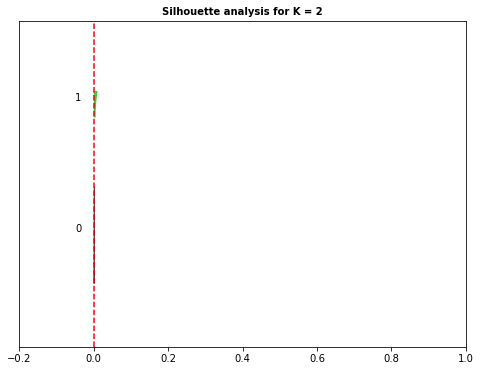

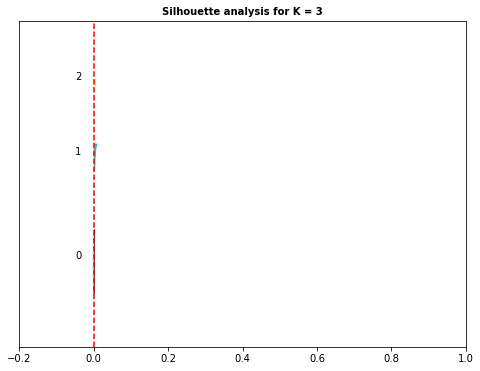

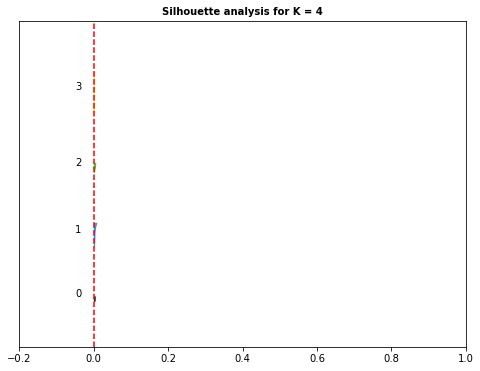

In [14]:
silhouette(kmeans_results, final_df, plot=True)

In [15]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

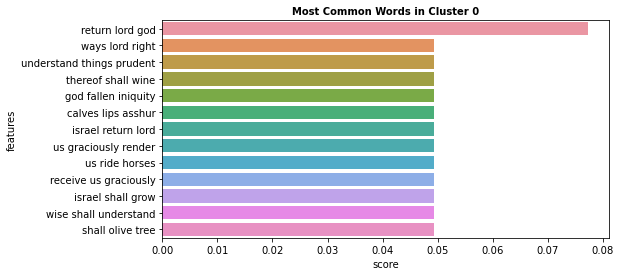

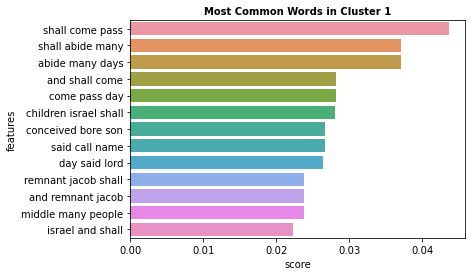

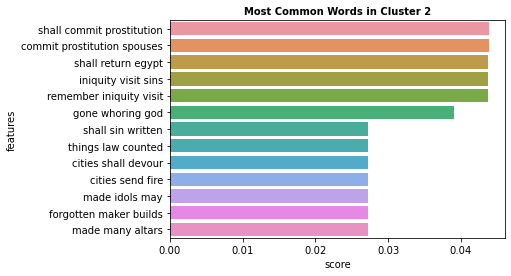

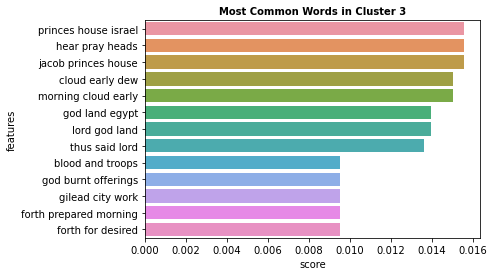

In [16]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [17]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

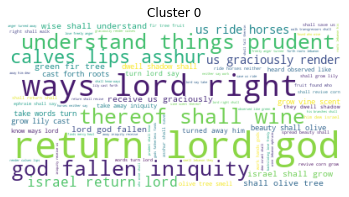

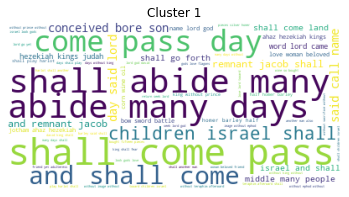

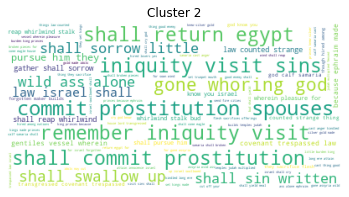

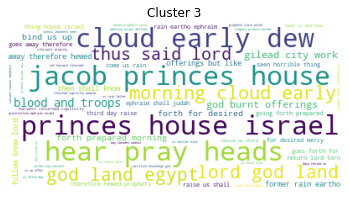

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [19]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Oseias_1,"'word', 'lord', 'came', 'hosea', ',', 'son', '...",1
101,Oseias_2,"'say', 'brothers', ',', 'ammi', ';', 'sisters'...",1
102,Oseias_3,"'said', 'lord', ',', 'go', 'yet', ',', 'love',...",1
103,Oseias_4,"'hear', 'word', 'lord', ',', 'children', 'isra...",2
104,Oseias_5,"'hear', ',', 'priests', ';', 'listen', ',', 'h...",3


In [20]:
print(df)

          Autor                                              Livro  label
100    Oseias_1  'word', 'lord', 'came', 'hosea', ',', 'son', '...      1
101    Oseias_2  'say', 'brothers', ',', 'ammi', ';', 'sisters'...      1
102    Oseias_3  'said', 'lord', ',', 'go', 'yet', ',', 'love',...      1
103    Oseias_4  'hear', 'word', 'lord', ',', 'children', 'isra...      2
104    Oseias_5  'hear', ',', 'priests', ';', 'listen', ',', 'h...      3
105    Oseias_6  'come', ',', 'let', 'us', 'return', 'lord', ':...      3
106    Oseias_7  'would', 'healed', 'israel', ',', 'iniquity', ...      0
107    Oseias_8  'set', 'trumpet', 'mouth', '.', 'shall', 'come...      2
108    Oseias_9  'rejoice', ',', 'israel', ',', 'joy', ',', 'pe...      2
109   Oseias_10  'israel', 'empty', 'vine', ',', 'brings', 'for...      3
110   Oseias_11  'israel', 'child', ',', 'loved', ',', 'called'...      3
111   Oseias_12  'ephraim', 'feeds', 'wind', ',', 'follows', 'e...      3
112   Oseias_13  'ephraim', 'spoke', '